## Lab2 - Activity 3 - Graph Analysis

### References: 
#### 1. Lab2.pdf
#### 2. June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV
#### 3. June 10-July 12, 2015 - Gaming, Jobs and Broadband - Crosstab
#### 4. June 10-July 12, 2015 - Gaming, Jobs and Broadband - Questionnaire
#### 5. CSV files - https://cran.r-project.org/doc/manuals/R-data.pdf or http://rprogramming.net/read-csv-in-r/
#### 6. SQLite - https://cran.r-project.org/web/packages/RSQLite/RSQLite.pdf
#### 7. qplot/ggplot2 - https://docs.ggplot2.org/dev/vignettes/qplot.html or https://www.statmethods.net/advgraphs/ggplot2.html or https://docs.ggplot2.org/current/position_jitter.html

#### Include Necessary Libraries

In [265]:
library("sqldf")
library(plyr)
library(RSQLite)
library(dplyr)
library(ggplot2)

#### Establish Connection

In [266]:
myDB <- "database.sqlite"
conn <- dbConnect(drv = SQLite(), dbname= myDB)

#### Read Data from CSV

In [267]:
Gaming<- read.csv(file="June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", header=TRUE)
head(Gaming)

ï..psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,...,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,...,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,...,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,...,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,...,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,...,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,...,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


#### Check if Data Received

In [268]:
read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", sql = 'select * from file',eol="\n")

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

Ã¯..psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,...,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,...,1,2,,1,99,,,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,...,3,2,,2,6,,,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,...,1,2,,1,3,,,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,...,2,2,,1,6,,,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,...,1,2,,1,3,2,,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,...,3,2,,1,8,,,67601,1.000000,0.3192737
100049,1,61015,1,R,1,42,1,1,1,...,1,2,,1,99,,,15748,1.387097,0.4428635
100051,1,61915,1,R,2,26,1,1,1,...,2,2,,1,7,,,49690,1.645161,0.5252567
100058,1,61015,1,R,3,40,2,1,2,...,5,2,,1,6,,,73655,1.000000,0.3192737
100059,1,61015,1,U,1,23,1,1,3,...,4,2,,1,3,,,4412,2.935484,0.9372228


## List of Questions 

### Question 1: What is the Marital Status depending on Sex and Age?

In [269]:
answer1<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
END as 'Age',
CASE WHEN marital='1' THEN 'Married'
     WHEN marital='2' THEN 'Living with a partner'
     WHEN marital='3' THEN 'Divorced'
     WHEN marital='4' THEN 'Separated'
     WHEN marital='5' THEN 'Widowed'
     WHEN marital='6' THEN 'Never been married'
     WHEN marital='8' THEN 'Dont Know'
     WHEN marital='9' THEN 'Refused'
END as 'MaritalStatus',
CASE WHEN sex='1' THEN 'Male'
     WHEN sex='2' THEN 'Female' 
END as 'Sex' from file",
eol="\n")
list(answer1)

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

Age,MaritalStatus,Sex
30-50,Married,Female
50-70,Married,Female
70-100,Widowed,Female
30-50,Married,Female
50-70,Refused,Female
50-70,Married,Female
70-100,Married,Male
70-100,Married,Male
70-100,Widowed,Male
70-100,Married,Male


#### In the above statement, the 'sqlite' query takes CASE values only and thus all remaining unnecessary data is filtered. Also batches of data is generated as needed, from the csv file and stored in the new dataframe. 

#### Below we will look at a Graph, to understand the stored data.


Warning message:
"closing unused connection 6 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"Warning message:
"closing unused connection 5 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

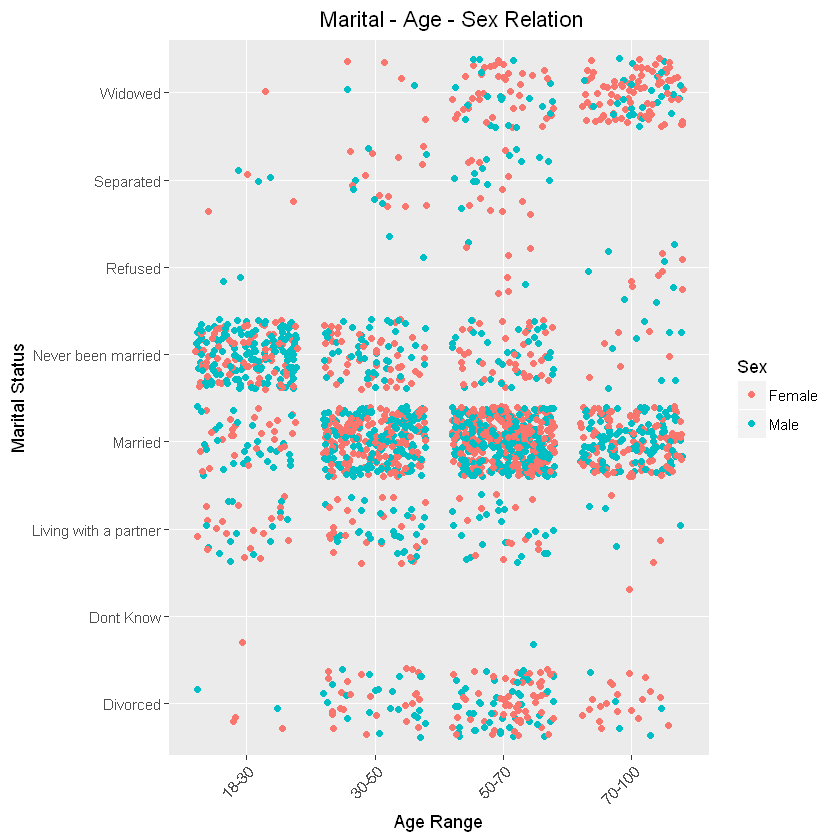

In [270]:
qplot(Age,MaritalStatus, data = answer1, geom= "jitter" , color = Sex, xlab= "Age Range", ylab = "Marital Status",
      main = "                         Marital - Age - Sex Relation" ) +theme(axis.text.x = element_text(angle = 45, hjust = 1))


#### Marital - Age - Sex - Relation: We can infer a lot of things from the above Jitter Graph like,
#### 1. Widowed people generally lie in the 70-100 age group (men dominating).
#### 2. Seperated people tend to lie in the 30-50 & 50-70 age group.
#### 3. Never Been Married - 18-30 age group dominates (men dominating).
#### 4. Married people tend to be in the 30-50 & 50-70 age group.
#### 5. Living with a partner - varies but less in the 70-100 age group.
#### 6. Divorced people clearly lie in the 50-70 age group.

### Sex - MaritalStatus - Relation (Below)

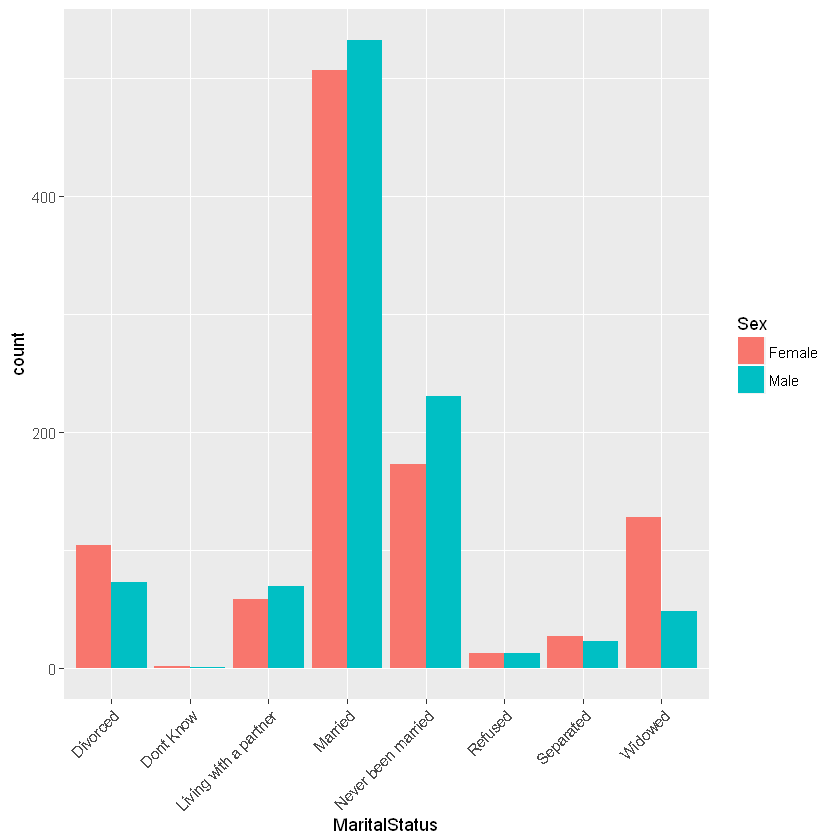

In [271]:
ggplot(answer1, aes(x=MaritalStatus,fill= Sex),xlab="MaritalStatus",ylab="Sex") + geom_bar(position="dodge") +theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Question 2: Which Community (Rural, SemiUrban, Urban) depending on Income and Education?

In [272]:
answer2<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select CASE WHEN usr='U' THEN 'Urban'
     WHEN usr='S' THEN 'Suburban'
     WHEN usr='R' THEN 'Rural'
END as 'CommunityStatus',
CASE WHEN inc='1' THEN 'Less than $10000'
     WHEN inc='2' THEN '10 to under $20000'
     WHEN inc='3' THEN '20 to under $30000'
     WHEN inc='4' THEN '30 to under $40000'
     WHEN inc='5' THEN '40 to under $50000'
     WHEN inc='6' THEN '50 to under $75000'
     WHEN inc='7' THEN '75 to under $100000'
     WHEN inc='8' THEN '100 to under $150000'
     WHEN inc='9' THEN '$150000 or more'
     WHEN inc='98' THEN 'Dont know'
     WHEN inc='99' THEN 'Refused'
END as 'Income',
CASE WHEN educ2='1' then 'Less than high school'
     WHEN educ2='2' then 'High school incomplete'
     WHEN educ2='3' then 'High school graduate'
     WHEN educ2='4' then 'Some college, no degree'
     WHEN educ2='5' then 'Two year associate degree'
     WHEN educ2='6' then 'Four year college'
     WHEN educ2='7' then 'No postgraduate degree'
     WHEN educ2='8' then 'Postgraduate degree'
     WHEN educ2='98' then 'Dont know'
     WHEN educ2='99' then 'Refused'
END as 'Education' from file",
eol="\n")
list(answer2)

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

CommunityStatus,Income,Education
Suburban,Refused,Four year college
Urban,50 to under $75000,"Some college, no degree"
Suburban,20 to under $30000,Less than high school
Suburban,50 to under $75000,Two year associate degree
Urban,20 to under $30000,"Some college, no degree"
Rural,100 to under $150000,Four year college
Rural,Refused,Four year college
Rural,75 to under $100000,"Some college, no degree"
Rural,50 to under $75000,Four year college
Urban,20 to under $30000,High school graduate


#### In the above statement, the 'sqlite' query takes CASE values only and thus all remaining unnecessary data is filtered. Also batches of data is generated as needed, from the csv file and stored in the new dataframe. 

#### Below we will look at a Graph, to understand the stored data.


Warning message:
"closing unused connection 5 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

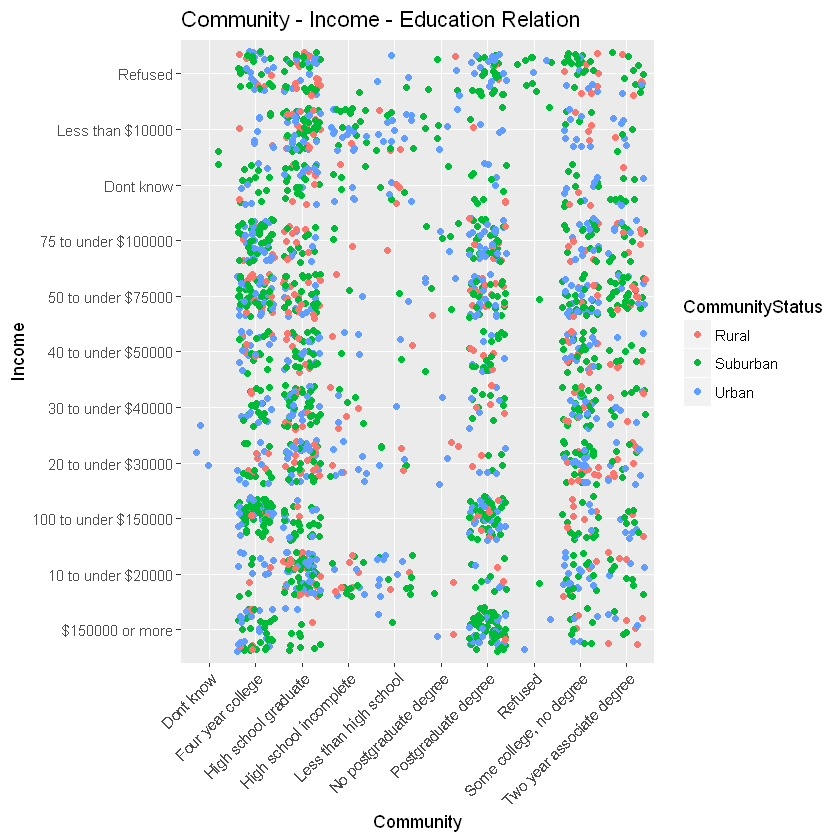

In [273]:
qplot(Education,Income, data = answer2, geom= "jitter" , color = CommunityStatus, xlab= "Community", ylab = "Income",
      main = "Community - Income - Education Relation" ) +theme(axis.text.x = element_text(angle = 45, hjust = 1))


#### Community - Income - Education Relation: We can infer a lot of things from the above Jitter Graph like,
#### 1. Four Year College - Better income jobs, Tend to live in Sub-Urban or Urban areas
#### 2. High School graduate - Medium income jobs, compared to other highly educated people
#### 3. High School Incomplete/ Less than High School - Earn the lowest among all.
#### 4. College dropouts/Two year associate degree - Medium income jobs tend to live more in Sub-Urban or Urban areas.
#### 5. Postgraduate Degree - Higher income jobs, Tend to live in Sub-Urban or Urban areas

#### This shows, standard of living and income increases as education of the person increases.

### Education - Community Status - Relation (BELOW)

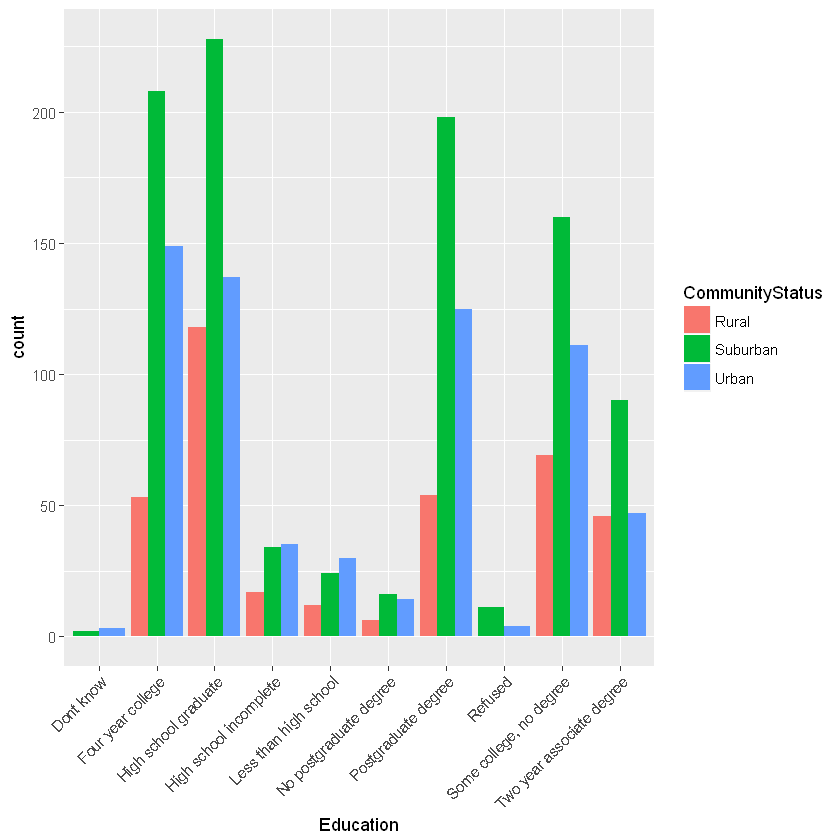

In [274]:
ggplot(answer2, aes(x=Education,fill= CommunityStatus)) + geom_bar(position="dodge") +theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Clear indication from the above graph that there is a huge gap between people living in rural and urban areas when their education is higher and not so much gap between living status when the individual has less education

### Question 3: What is the Employment status of an individual depending upon his/her Gender and Education he/she has?

In [275]:
answer3<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select CASE WHEN emplnw='1' THEN 'Employed Full-time'
     WHEN emplnw='2' THEN 'Emloyed Part-time'
     WHEN emplnw='3' THEN 'Retired'
     WHEN emplnw='4' THEN 'Not employed for pay'
     WHEN emplnw='5' THEN 'Have own business/Self-employed'
     WHEN emplnw='6' THEN 'Disabled'
     WHEN emplnw='7' THEN 'Student'
     WHEN emplnw='8' THEN 'Other'
     WHEN emplnw='98' THEN 'Dont know'
     WHEN emplnw='99' THEN 'Refused'
     ELSE '' 
END as 'EmploymentStatus',
CASE WHEN sex='1' THEN 'Male'
     WHEN sex='2' THEN 'Female' 
END as 'Sex',
CASE WHEN educ2='1' then 'Less than high school'
     WHEN educ2='2' then 'High school incomplete'
     WHEN educ2='3' then 'High school graduate'
     WHEN educ2='4' then 'Some college, no degree'
     WHEN educ2='5' then 'Two year associate degree'
     WHEN educ2='6' then 'Four year college'
     WHEN educ2='7' then 'No postgraduate degree'
     WHEN educ2='8' then 'Postgraduate degree'
     WHEN educ2='98' then 'Dont know'
     WHEN educ2='99' then 'Refused'
     ELSE ''
END as 'Education' from file",
eol="\n")
list(answer3)

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

EmploymentStatus,Sex,Education
Not employed for pay,Female,Four year college
Retired,Female,"Some college, no degree"
Retired,Female,Less than high school
Employed Full-time,Female,Two year associate degree
Retired,Female,"Some college, no degree"
Emloyed Part-time,Female,Four year college
Retired,Male,Four year college
Retired,Male,"Some college, no degree"
Retired,Male,Four year college
Retired,Male,High school graduate


#### In the above statement, the 'sqlite' query takes CASE values only and thus all remaining unnecessary data is filtered. Also batches of data is generated as needed, from the csv file and stored in the new dataframe. 

#### Below we will look at a Graph, to understand the stored data.


Warning message:
"closing unused connection 5 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

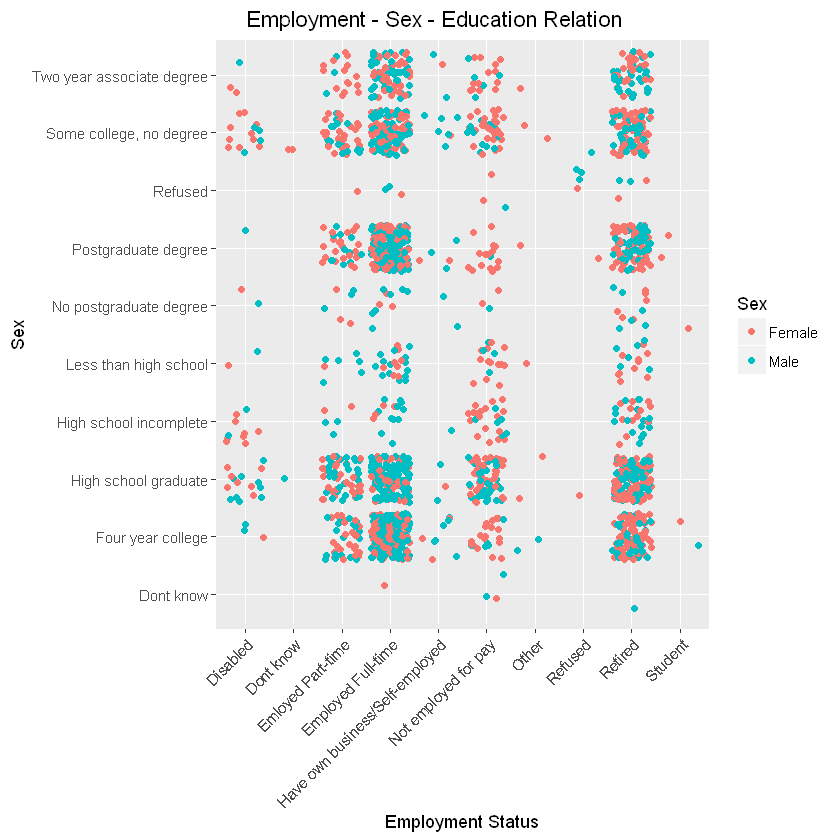

In [276]:
qplot(EmploymentStatus,Education, data = answer3, geom= "jitter", color = Sex, xlab= "Employment Status", ylab = "Sex", 
      main = "     Employment - Sex - Education Relation" ) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Employment - Sex - Education Relation: We can infer a lot of things from the above Jitter Graph like,
#### 1. Four Year College - Employed Full-time or Part-time (male dominating)
#### 2. High School Graduate - Employed Full-time or Part-time (male dominating)
#### 3. Post Graduate Degree - Employed Full-time or Part-time (male dominating)
#### 4. Not Employed for pay - Majority of females


### Sex - Employment Status Relation (BELOW)

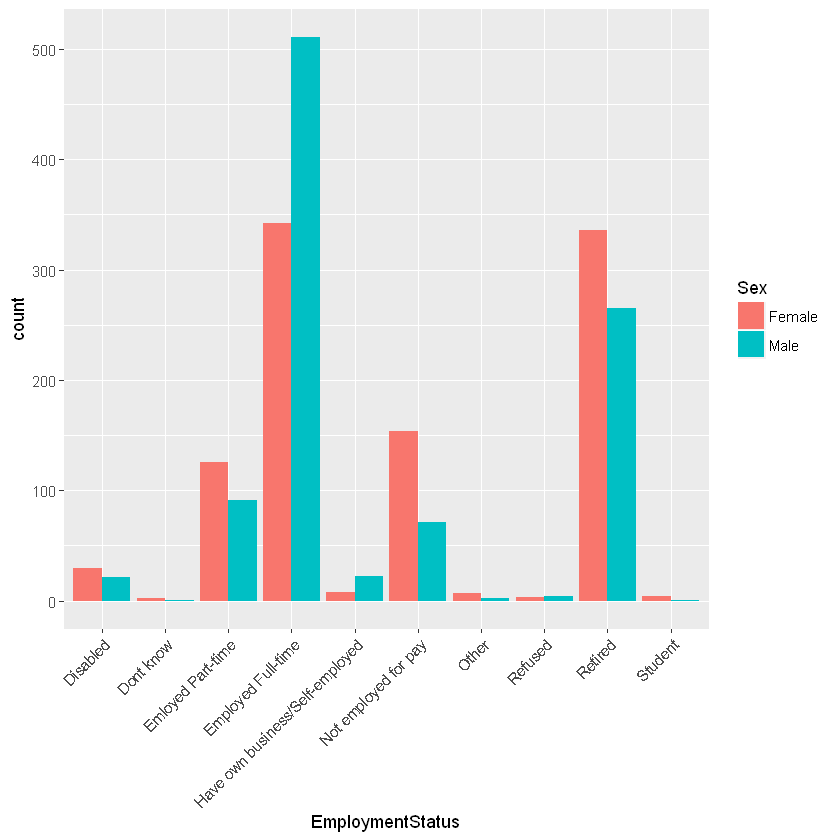

In [277]:
ggplot(answer3, aes(x=EmploymentStatus,fill= Sex)) + geom_bar(position="dodge") +theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### The above graph clearly shows that more females are employed as part-time or they are not employed for pay. However, more males are employed for full-time or have own business or are self-employed

### Question 4: Which Party does an individual support depending on Race and Age?

In [278]:
answer4<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select CASE WHEN party='1' THEN 'Republican'
     WHEN party='2' THEN 'Democrat'
     WHEN party='3' THEN 'Independent'
     WHEN party='4' THEN 'No preference'
     WHEN party='5' THEN 'Other party'
     WHEN party='8' THEN 'Dont know'
     WHEN party='9' THEN 'Refused'
END as 'PartySupport',
CASE WHEN race='1' THEN 'White'
     WHEN race='2' THEN 'Black or African-American'
     WHEN race='3' THEN 'Asian or Pacific Islander'
     WHEN race='4' THEN 'Mixed Race'
     WHEN race='5' THEN 'Native American/American Indian'
     WHEN race='6' THEN 'Other'
     WHEN race='8' THEN 'Dont know'
     WHEN race='9' THEN 'Refused'
END as 'Race',
CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
END as 'Age' from file",
eol="\n")
list(answer4)

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

PartySupport,Race,Age
Independent,White,30-50
Democrat,Black or African-American,50-70
Republican,White,70-100
Republican,White,30-50
Refused,White,50-70
Independent,White,50-70
Independent,White,70-100
Republican,White,70-100
Democrat,White,70-100
Independent,White,70-100


#### In the above statement, the 'sqlite' query takes CASE values only and thus all remaining unnecessary data is filtered. Also batches of data is generated as needed, from the csv file and stored in the new dataframe.

#### Below we will look at a Graph, to understand the stored data.

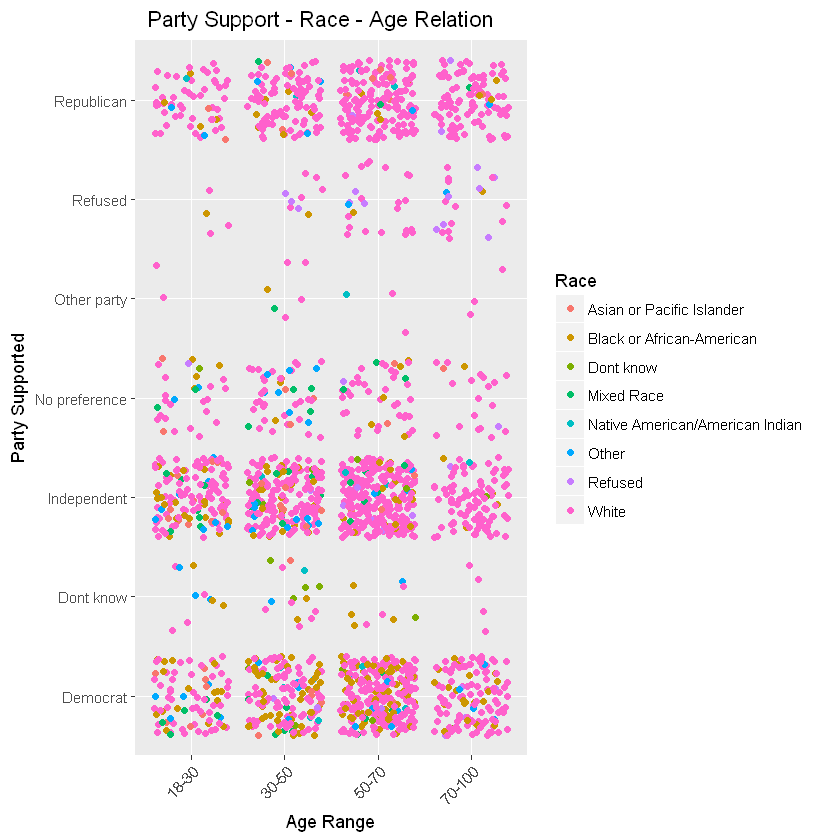

In [279]:
qplot(Age,PartySupport, data = answer4, geom= "jitter" , color = Race, xlab= "Age Range", ylab = "Party Supported"
     , main = "  Party Support - Race - Age Relation" ) +theme(axis.text.x = element_text(angle = 45, hjust = 1))


#### Party Support - Age - Race Relation: We can infer a lot of things from the above Jitter Graph like,
#### 1. Republican Party - Majority support for the party is from White People (50-70 age majority)
#### 2. Independent Party - Majority support comes from White People along with few Black or African-American and Native American people.
#### 3. Democrat Party - Black People tend to support Democrat Party the most along with White and mixed race people and others.

### Age - Party Support Relation (BELOW)

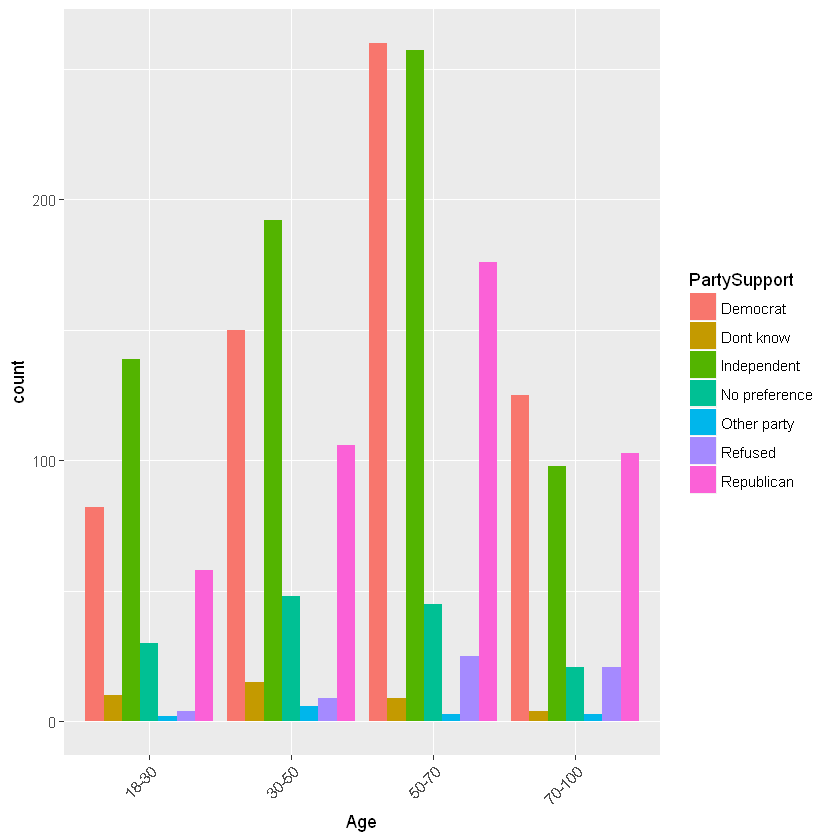

In [280]:
ggplot(answer4, aes(x=Age,fill= PartySupport)) + geom_bar(position="dodge") +theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### The above graph gives clear indication that people in the age group 18-30 support Independent Party, whereas 30-50 age group people support Independent more than Democrat also there is almost a tie between people for support towards Democrat and Independent Party in 50-70 age group, while 70-100 people support Democrat more than Independent or Republican party.

### Question 5: What is the Internet Usage Situation depending upon Sex and Age?

In [281]:
answer5<-read.csv.sql("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", 
    sql = "select 
CASE WHEN intfreq='1' THEN 'Almost Constantly'
     WHEN intfreq='2' THEN 'Several times a day'
     WHEN intfreq='3' THEN 'About once a week'
     WHEN intfreq='4' THEN 'Several times a week'
     WHEN intfreq='5' THEN 'Less Often'
     WHEN intfreq='8' THEN 'Dont know'
     WHEN intfreq='9' THEN 'Refused'
END as 'InternetUse',
CASE WHEN age<30 then '18-30'
     WHEN age>=30 and age<50 then '30-50'
     WHEN age>=50 and age<70 then '50-70'
     WHEN age>=70 and age<100 then '70-100'
END as 'Age',
CASE WHEN sex='1' THEN 'Male'
     WHEN sex='2' THEN 'Female'
END as 'Sex' from file", 
eol="\n")
answer5 <- na.omit(answer5)
list(answer5)

Warning message:
"closing unused connection 4 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

,InternetUse,Age,Sex
1,Almost Constantly,30-50,Female
2,Less Often,50-70,Female
4,Several times a day,30-50,Female
5,About once a week,50-70,Female
6,Several times a week,50-70,Female
9,About once a week,70-100,Male
11,Several times a week,70-100,Female
12,Several times a day,70-100,Female
13,Almost Constantly,50-70,Male
14,Several times a day,70-100,Female


#### In the above statement, the 'sqlite' query takes CASE values only and thus all remaining unnecessary data is filtered. Also batches of data is generated as needed, from the csv file and stored in the new dataframe.

#### Below we will look at a Graph, to understand the stored data.

Warning message:
"closing unused connection 5 (June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv)"

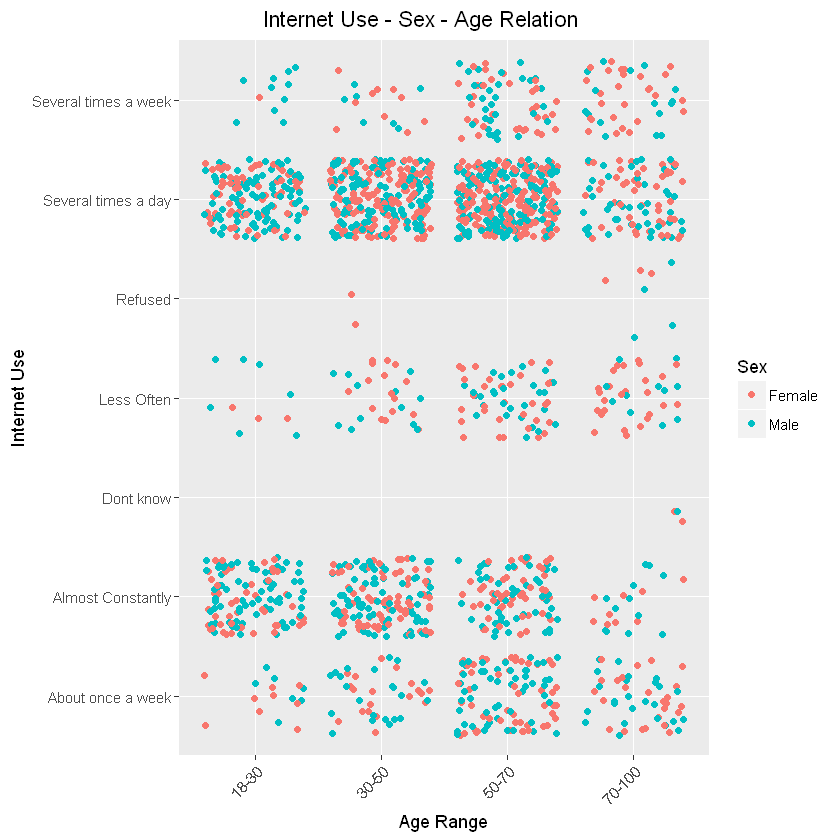

In [282]:
qplot(Age,InternetUse, data = answer5, geom= "jitter" , color = Sex, xlab= "Age Range", ylab = "Internet Use"
     , main = "              Internet Use - Sex - Age Relation" ) +theme(axis.text.x = element_text(angle = 45, hjust = 1))


#### Internet Use - Age - Sex Relation: We can infer a lot of things from the above Jitter Graph like,
#### 1.  Almost Constantly - Younger age group people tend to use lots of Internet
#### 2. About once a week - Age group 50-70 tend to fall in this category
#### 3. Less often - Older age groups 50-70 & 70-100 constitute majority of the people in this category
#### 4. Several Times a day - Younger age group people tend to use lots of Internet
#### 5. Several Times a week - Again, older age groups fall in this category

#### Thus we can infer that younger people use more internet than elder people

### Internet Use - Sex - Relation (BELOW)

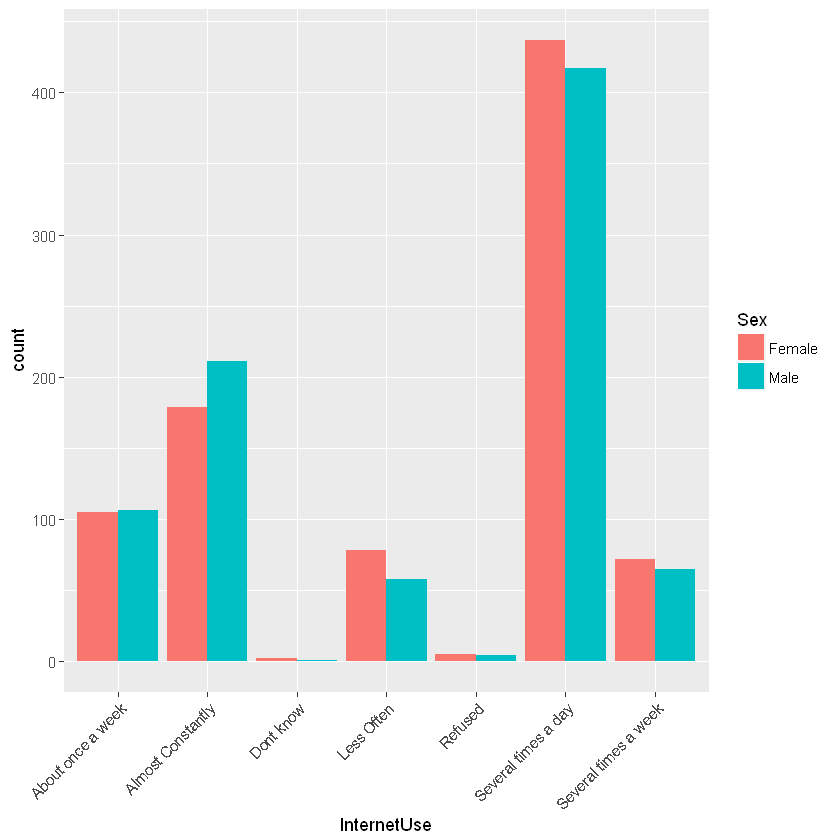

In [283]:
ggplot(answer5, aes(x=InternetUse,fill= Sex),xlab="Internet Usage",ylab="Sex") + geom_bar(position="dodge") +theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### The above graph clearly gives us an indication that there isn't much difference between males and females on the use of internet in any category and the numbers are almost the same.

### END OF LAB2- Activity 3